# Customer Service Requests Analysis

In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import time
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# 1. Import a 311 NYC service request

In [2]:
#importing library to hide any warning prompts

import warnings 
warnings.filterwarnings("ignore")
nyc311_df = pd.read_csv('C:/Users/brian/Documents/DATA SCIENCE/Python/Assignments/Assessment/311_Service_Requests_from_2010_to_Present.csv') 



In [3]:
#displaying a sample of the dataframe 

nyc311_df.head(5)

,Unique Key,Created Date,Closed Date,Month,MonthNumber,Agency,Agency Name,Complaint Type,Descriptor,Location Type,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,30281825,3/29/2015 0:33,3/29/2015 4:41,March,3,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"
1,30280004,3/29/2015 0:33,3/29/2015 4:38,March,3,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
2,30283424,3/29/2015 0:33,3/29/2015 3:40,March,3,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
3,30281230,3/29/2015 0:33,3/29/2015 2:33,March,3,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
4,30281872,3/29/2015 0:33,NaN,March,3,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checkcking the different data types 

nyc311_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Month                           300698 non-null  object 
 4   MonthNumber                     300698 non-null  int64  
 5   Agency                          300698 non-null  object 
 6   Agency Name                     300698 non-null  object 
 7   Complaint Type                  300698 non-null  object 
 8   Descriptor                      294784 non-null  object 
 9   Location Type                   300567 non-null  object 
 10  Incident Zip                    298083 non-null  float64
 11  Incident Address                256288 non-null  object 
 12  Street Name     

In [5]:
#checking the total count of columns that have null values

nyc311_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Month                                  0
MonthNumber                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Actio

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [6]:
#dropping all the null values in the Closed Date column

nyc311_df = nyc311_df.dropna(subset=['Closed Date'])

In [7]:
#checking the null value count for the columns that will be used 

nyc311_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Month                                  0
MonthNumber                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5909
Location Type                        128
Incident Zip                         507
Incident Address                   44397
Street Name                        44397
Cross Street 1                     47563
Cross Street 2                     47653
Intersection Street 1             255094
Intersection Street 2             255180
Address Type                         707
City                                 506
Landmark                          298185
Facility Type                         15
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Actio

In [8]:
#changing the Created Date column to a datetime data type

nyc311_df['Created Date'] = pd.to_datetime(nyc311_df['Created Date'])

In [9]:
#changing the Closed Date column to a datetime data type

nyc311_df['Closed Date'] = pd.to_datetime(nyc311_df['Closed Date'])

In [10]:
#checking the Created Date and Closed Date columns to make sure the data type change was successful 

nyc311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      298534 non-null  int64         
 1   Created Date                    298534 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Month                           298534 non-null  object        
 4   MonthNumber                     298534 non-null  int64         
 5   Agency                          298534 non-null  object        
 6   Agency Name                     298534 non-null  object        
 7   Complaint Type                  298534 non-null  object        
 8   Descriptor                      292625 non-null  object        
 9   Location Type                   298406 non-null  object        
 10  Incident Zip                    298027 non-null  float64

In [11]:
#creating a Request_Closing_Time column from the difference of Closed Date and Created Date

nyc311_df['Request_Closing_Time'] = nyc311_df['Closed Date'] - nyc311_df['Created Date']

In [12]:
#Displaying the different columns so they can be re-arranged for easier data wrangling 

nyc311_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Month', 'MonthNumber',
       'Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
  

In [13]:
#re-ordering the columns to fit my needs

nyc311_df2 = nyc311_df.reindex(columns=['Created Date', 'Closed Date','Request_Closing_Time' ,'Month', 'MonthNumber',
        'Complaint Type', 'Descriptor','Location Type',])

In [14]:
#displaying a sample of what the new dataframe looks like

nyc311_df2.head(20)

,Created Date,Closed Date,Request_Closing_Time,Month,MonthNumber,Complaint Type,Descriptor,Location Type
0,2015-03-29 00:33:00,2015-03-29 04:41:00,0 days 04:08:00,March,3,Noise - Commercial,Loud Music/Party,Store/Commercial
1,2015-03-29 00:33:00,2015-03-29 04:38:00,0 days 04:05:00,March,3,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant
2,2015-03-29 00:33:00,2015-03-29 03:40:00,0 days 03:07:00,March,3,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant
3,2015-03-29 00:33:00,2015-03-29 02:33:00,0 days 02:00:00,March,3,Blocked Driveway,Partial Access,Street/Sidewalk
5,2015-03-29 00:34:00,2015-03-29 01:13:00,0 days 00:39:00,March,3,Noise - Commercial,Loud Music/Party,Store/Commercial
6,2015-03-29 00:35:00,2015-03-29 02:52:00,0 days 02:17:00,March,3,Noise - Commercial,Loud Music/Party,Store/Commercial
7,2015-03-29 00:35:00,2015-03-29 08:41:00,0 days 08:06:00,March,3,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk
8,2015-03-29 00:35:00,2015-03-29 04:14:00,0 days 03:39:00,March,3,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk
9,2015-03-29 00:37:00,2015-03-29 01:02:00,0 days 00:25:00,March,3,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant
10,2015-03-29 00:42:00,2015-03-29 02:57:00,0 days 02:15:00,March,3,Blocked Driveway,No Access,Street/Sidewalk


In [15]:
#created a group from the dataframe 

grouped = nyc311_df2.groupby(['Complaint Type','Descriptor','Month'])

In [16]:
# displayed the finished dataframe including the new Requested_Closing_Time column

grouped.get_group(('Animal Abuse' , 'Neglected','March'))

,Created Date,Closed Date,Request_Closing_Time,Month,MonthNumber,Complaint Type,Descriptor,Location Type
207,2015-03-29 08:51:00,2015-03-29 12:14:00,0 days 03:23:00,March,3,Animal Abuse,Neglected,Street/Sidewalk
211,2015-03-29 08:59:00,2015-03-29 16:45:00,0 days 07:46:00,March,3,Animal Abuse,Neglected,Residential Building/House
301,2015-03-29 11:34:00,2015-03-29 13:14:00,0 days 01:40:00,March,3,Animal Abuse,Neglected,Residential Building/House
350,2015-03-29 12:50:00,2015-03-29 14:32:00,0 days 01:42:00,March,3,Animal Abuse,Neglected,Residential Building/House
352,2015-03-29 12:51:00,2015-03-29 15:45:00,0 days 02:54:00,March,3,Animal Abuse,Neglected,Residential Building/House
437,2015-03-29 15:05:00,2015-03-29 19:35:00,0 days 04:30:00,March,3,Animal Abuse,Neglected,Street/Sidewalk
444,2015-03-29 15:16:00,2015-03-29 20:51:00,0 days 05:35:00,March,3,Animal Abuse,Neglected,Residential Building/House
505,2015-03-29 16:43:00,2015-03-29 17:25:00,0 days 00:42:00,March,3,Animal Abuse,Neglected,Store/Commercial
533,2015-03-29 17:23:00,2015-03-30 06:00:00,0 days 12:37:00,March,3,Animal Abuse,Neglected,Street/Sidewalk
544,2015-03-29 17:36:00,2015-03-29 18:00:00,0 days 00:24:00,March,3,Animal Abuse,Neglected,Residential Building/House


* The Request_Closing_Time column is formated as days:hours:minutes:seconds

# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

# a)  Monthly Increase From March To April For Residential Building/House            Animal abuse Neglection...

In [17]:
#grouping the Animal Abuse, Neglected,and March into a dataframe

march_df_Resdtl_bldg = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','March')))

In [18]:
#displayed the total count for calls for neglected animals in Residential Buildings/Houses in the month of March 

occur = march_df_Resdtl_bldg.groupby(['Month','Location Type']).size()
display(occur)

Month  Location Type             
March  Residential Building/House    17
       Store/Commercial               5
       Street/Sidewalk                8
dtype: int64

In [19]:
#grouping the Animal Abuse, Neglected,and March incidents into a dataframe

april_df_Resdtl_bldg = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','April')))

In [20]:
#displayed the total count for calls for neglected animals in Residential Buildings/Houses in the month of April 

occur = april_df_Resdtl_bldg.groupby(['Month','Location Type']).size()
display(occur)

Month  Location Type             
April  Parking Lot                     3
       Residential Building/House    301
       Store/Commercial               22
       Street/Sidewalk                43
dtype: int64

* In March there were 17 occurrences of neglected animals in Residential Buildings or Houses. The following month in April the occurrences skyrocketed to 301. This was a 1675.5% increase in only two months.Unfortunately, there is not enough data to understand why this jump occurred. If I had more data I could study if there was a correlation between the daily weather. I hypothesize that animals may be put outside by owners who do not have A/C when the weather becomes hot. 

# b) Where Do Majority Of Occurrences Fall In The Month Of July ?

In [21]:
#creating a new dataframe that has grouped all the Animal Abuse, Neglected, occurrences in July
July_df_Resdtl_bldg = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','July')))

#displaying all the total counts for all categories in the new dataframe
occur = July_df_Resdtl_bldg.groupby(['Month','Location Type']).size()

display(occur)

Month  Location Type             
July   Park/Playground                 7
       Parking Lot                     5
       Residential Building/House    373
       Store/Commercial               39
       Street/Sidewalk                97
       Subway Station                  2
dtype: int64

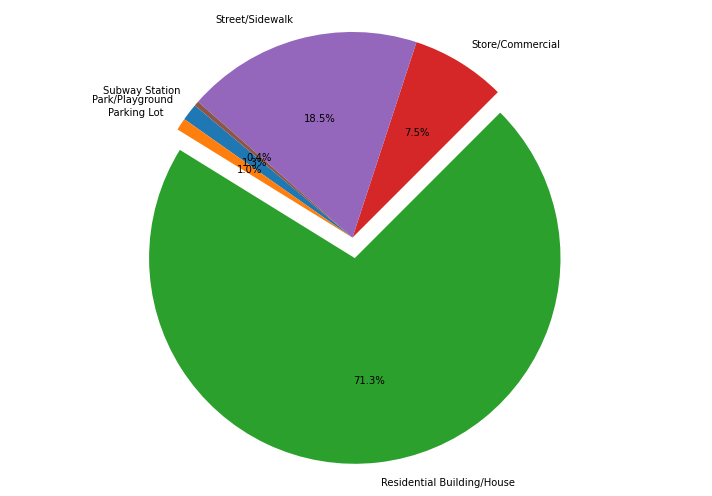

In [22]:
#displaying the pie chart showing where the majority of occurrences is in the month of July

import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
labels = 'Park/Playground','Parking Lot','Residential Building/House','Store/Commercial','Street/Sidewalk','Subway Station'
sizes  = [7,5,373,39,97,2]
colors = ['gold','yellowgreen','lightcoral','lightskyblue']
explode = (0, 0, 0.1,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=140)

plt.axis('equal')
plt.tight_layout()
plt.show()



* In the month of July, 71% of the Animal Abuse neglection occurrences were in Residential Buildings or Houses. Store/Commercial occurrences made 7.5% of the Animal Abuse calls. Street/Sidewalk occurrences made up 18.5%, Subway Station occurrences made 0.4%, Park/Playground occurrences made up 1.3%, and Parking Lot occurrences accounted for 1.0% of all occurrences in July. Unfortunately, there is not enough data to determine why July has most occurrences in residential buildings or houses. 

# c) What Was The Peak of Total Occurrences ?

In [23]:
# displaying the total amount of occurrences for the month of March

print('March:Total Occurrences')
march_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','March')))
march_df[['Month']].count()

March:Total Occurrences


Month    30
dtype: int64

In [24]:
# displaying the total amount of occurrences for the month of April

print('April:Total Occurrences')
april_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','April')))
april_df[['Month']].count()

April:Total Occurrences


Month    369
dtype: int64

In [25]:
# displaying the total amount of occurrences for the month of May

print('May:Total Occurrences')
may_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','May')))
may_df[['Month']].count()

May:Total Occurrences


Month    424
dtype: int64

In [26]:
# displaying the total amount of occurrences for the month of June

print('June:Total Occurrences')
june_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','June')))
june_df[['Month']].count()

June:Total Occurrences


Month    446
dtype: int64

In [27]:
# displaying the total amount of occurrences for the month of July

print('July:Total Occurrences')
july_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','July')))
july_df[['Month']].count()

July:Total Occurrences


Month    526
dtype: int64

In [28]:
# displaying the total amount of occurrences for the month of August

print('August:Total Occurrences')
august_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','August')))
august_df[['Month']].count()

August:Total Occurrences


Month    401
dtype: int64

In [29]:
# displaying the total amount of occurrences for the month of September

print('September:Total Occurrences')
september_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','September')))
september_df[['Month']].count()

September:Total Occurrences


Month    419
dtype: int64

In [30]:
# displaying the total amount of occurrences for the month of October

print('October:Total Occurrences')
october_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','October')))
october_df[['Month']].count()

October:Total Occurrences


Month    418
dtype: int64

In [31]:
# displaying the total amount of occurrences for the month of November

print('November:Total Occurrences')
november_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','November')))
november_df[['Month']].count()

November:Total Occurrences


Month    368
dtype: int64

In [32]:
# displaying the total amount of occurrences for the month of December


print('December:Total Occurrences')
december_df = pd.DataFrame(grouped.get_group(('Animal Abuse' , 'Neglected','December')))
december_df[['Month']].count()

December:Total Occurrences


Month    381
dtype: int64

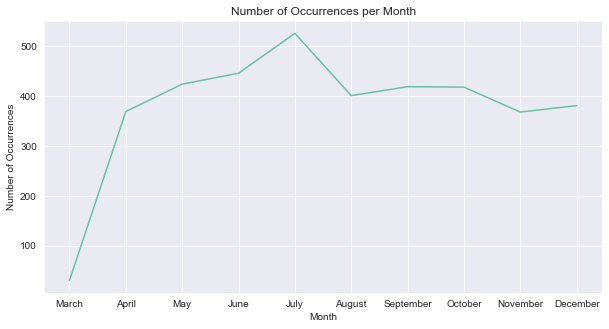

In [33]:
#displaying the line chart showing the progression of calls from March to December

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

month = ['March','April','May','June','July','August','September','October','November','December']
occur_number = [30,369,424,446,526,401,419,418,368,381]


sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.title('Number of Occurrences per Month')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')


sns.lineplot(x=month,y=occur_number)
plt.grid(True)
plt.show()



* In July there were 526 occurrences, which was the peak. After July the number of occurrences went down to 368 in November, and rose to 381 in December. From the previous insight we noticed that in July, 71% of these incidents were animals that were neglected in locations of residential buildings and houses. I would need more data to discover what, if any, the relationship between the summer time in New York and animals being neglected. One could hypothsize that July, which is a hot time period, pets could escape their owners homes in order to go outside to find more suitable environments.

# d) What Is The Progression Of Illegal Fireworks ?

In [34]:
#grouping the Complaint types by month

grouped2 = nyc311_df.groupby(['Complaint Type','Month'])

In [35]:
#displaying the total illegal fireworks count for the month of April

print('April Illegal Fireworks Count:')
april_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','April')))
april_illegalfireworks_df[['Complaint Type']].count()

April Illegal Fireworks Count:


Complaint Type    1
dtype: int64

In [36]:
#displaying the total illegal fireworks count for the month of May

print('May Illegal Fireworks Count:')
may_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','May')))
may_illegalfireworks_df[['Complaint Type']].count()

May Illegal Fireworks Count:


Complaint Type    9
dtype: int64

In [37]:
#displaying the total illegal fireworks count for the month of June

print('June Illegal Fireworks Count:')
june_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','June')))
june_illegalfireworks_df[['Complaint Type']].count()

June Illegal Fireworks Count:


Complaint Type    40
dtype: int64

In [38]:
#displaying the total illegal fireworks count for the month of July

print('July Illegal Fireworks Count:')
july_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','July')))
july_illegalfireworks_df[['Complaint Type']].count()

July Illegal Fireworks Count:


Complaint Type    93
dtype: int64

In [39]:
#displaying the total illegal fireworks count for the month of August

print('August Illegal Fireworks Count:')
august_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','August')))
august_illegalfireworks_df[['Complaint Type']].count()

August Illegal Fireworks Count:


Complaint Type    10
dtype: int64

In [40]:
#displaying the total illegal fireworks count for the month of September

print('September Illegal Fireworks Count:')
september_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','September')))
september_illegalfireworks_df[['Complaint Type']].count()

September Illegal Fireworks Count:


Complaint Type    4
dtype: int64

In [41]:
#displaying the total illegal fireworks count for the month of October

print('October Illegal Fireworks Count:')
october_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','October')))
october_illegalfireworks_df[['Complaint Type']].count()

October Illegal Fireworks Count:


Complaint Type    8
dtype: int64

In [42]:
#displaying the total illegal fireworks count for the month of November

print('November Illegal Fireworks Count:')
november_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','November')))
november_illegalfireworks_df[['Complaint Type']].count()

November Illegal Fireworks Count:


Complaint Type    2
dtype: int64

In [43]:
#displaying the total illegal fireworks count for the month of December

print('December Illegal Fireworks Count:')
december_illegalfireworks_df = pd.DataFrame(grouped2.get_group(('Illegal Fireworks','December')))
december_illegalfireworks_df[['Complaint Type']].count()

December Illegal Fireworks Count:


Complaint Type    1
dtype: int64

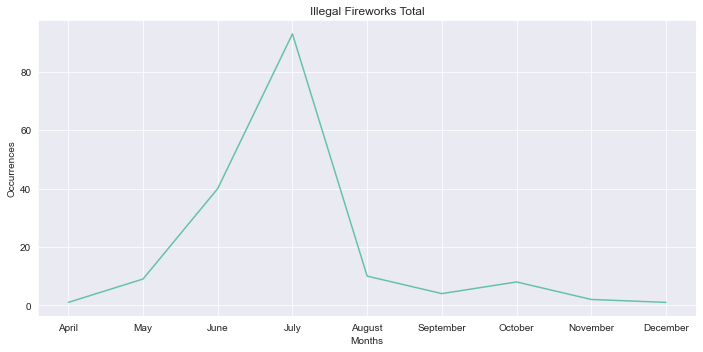

In [44]:
#displaying the line chart showing the progression of illegal fireworks occurrences from April to December

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

month = ['April','May','June','July','August','September','October','November','December']
occur_number = [1,9,40,93,10,4,8,2,1]

sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.title('Illegal Fireworks Total')
plt.xlabel('Months')
plt.ylabel('Occurrences')


plt.tight_layout()

sns.lineplot(x=month,y=occur_number)
plt.show()



* As suspected, the number of calls to 311 for illegal fireworks activity was 93 in July, which was the peak of total illegal fireworks occurrences. Please note that this is the month of the holiday known as Independence Day, and people usually celebrate with firereworks.

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [45]:
#re-ordering the columns

nyc311_df3 = nyc311_df.reindex(columns=['Complaint Type','Location Type','Request_Closing_Time'])

In [46]:
#displaying the columns that have null values

nyc311_df3.isnull().sum()

Complaint Type            0
Location Type           128
Request_Closing_Time      0
dtype: int64

In [47]:
#dropping the null values from the dataframe that will be used 

nyc311_df3 = nyc311_df3.dropna()

In [48]:
#checking to make sure the null value cells were dropped

nyc311_df3.isnull().sum()

Complaint Type          0
Location Type           0
Request_Closing_Time    0
dtype: int64

In [49]:
#displaying a sample of the new dataframe

nyc311_df3.head()

,Complaint Type,Location Type,Request_Closing_Time
0,Noise - Commercial,Store/Commercial,0 days 04:08:00
1,Noise - Commercial,Club/Bar/Restaurant,0 days 04:05:00
2,Noise - Commercial,Club/Bar/Restaurant,0 days 03:07:00
3,Blocked Driveway,Street/Sidewalk,0 days 02:00:00
5,Noise - Commercial,Store/Commercial,0 days 00:39:00


In [50]:
#displaying the average closing time for different complaint types grouped by location type

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

nyc311_df3.groupby(['Location Type','Complaint Type'])['Request_Closing_Time'].mean(numeric_only=False)

Location Type               Complaint Type           
Bridge                      Homeless Encampment                   0 days 03:49:00
Club/Bar/Restaurant         Drinking                    0 days 04:32:46.356164383
                            Noise - Commercial          0 days 03:03:50.601508223
                            Urinating in Public         0 days 07:55:08.571428571
Commercial                  Animal Abuse                0 days 05:20:32.903225806
Highway                     Derelict Vehicle            0 days 08:11:46.153846153
                            Homeless Encampment                   0 days 03:16:16
                            Traffic                     0 days 03:26:52.580645161
House and Store             Animal Abuse                0 days 05:00:49.032258064
House of Worship            Noise - House of Worship    0 days 03:11:50.420711974
Park                        Animal in a Park                     14 days 00:51:00
Park/Playground             Animal Abuse    

# 5. Perform a statistical test for the following:
 a) Whether the average response time across complaint types is similar or not (overall)
 
 b) Are the type of complaint or service requested and location related?
       

.

# a) Is the average response time across complaint types similar or not (overall)?

null hypothesis (H0): The average response time is similar across complaint types.

alternative hypothesis (Ha): The average response time is not equal across complaint types.

significance level α = 0.05

In [51]:
nyc311_df4 = nyc311_df.reindex(columns=['Complaint Type','Location Type','Request_Closing_Time'])

In [52]:
# grouping the complaint types and displaying the average times for each complaint type

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

nyc311_df4.groupby(['Complaint Type'])['Request_Closing_Time'].mean(numeric_only=False)

Complaint Type
Agency Issues                         0 days 05:15:30
Animal Abuse                0 days 05:12:47.587538619
Animal in a Park                     14 days 00:51:00
Bike/Roller/Skate Chronic   0 days 03:45:58.443396226
Blocked Driveway            0 days 04:44:27.283947402
Derelict Vehicle            0 days 07:21:50.935865362
Disorderly Youth                      0 days 03:33:30
Drinking                    0 days 03:51:42.447058823
Graffiti                    0 days 07:09:04.778761061
Homeless Encampment         0 days 04:21:55.842391304
Illegal Fireworks              0 days 02:45:42.500000
Illegal Parking             0 days 04:30:04.108034132
Noise - Commercial          0 days 03:08:49.902119329
Noise - House of Worship    0 days 03:11:36.297093649
Noise - Park                0 days 03:24:38.607657881
Noise - Street/Sidewalk     0 days 03:26:42.649970879
Noise - Vehicle             0 days 03:35:20.332296131
Panhandling                 0 days 04:22:19.868852459
Posting Adver

In [53]:
# creating a dataframe for grouped complaint types by average closing times

df_new1 = pd.DataFrame(nyc311_df4.groupby(['Complaint Type'])['Request_Closing_Time'].mean(numeric_only=False))
df_new1

,Request_Closing_Time
Complaint Type,
Agency Issues,0 days 05:15:30
Animal Abuse,0 days 05:12:47.587538619
Animal in a Park,14 days 00:51:00
Bike/Roller/Skate Chronic,0 days 03:45:58.443396226
Blocked Driveway,0 days 04:44:27.283947402
Derelict Vehicle,0 days 07:21:50.935865362
Disorderly Youth,0 days 03:33:30
Drinking,0 days 03:51:42.447058823
Graffiti,0 days 07:09:04.778761061


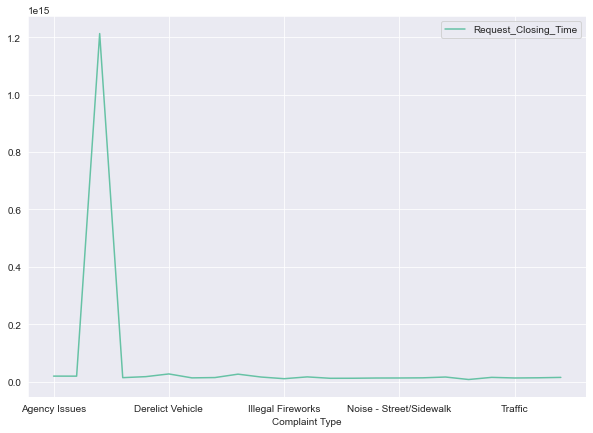

In [54]:
# displaying a visualization of the average request closing times 

df_new1.plot(figsize=(10,7))

plt.show()

The line chart shows that the majority of the closing times are similar, but it is always best practice to perform a statistical test to confirm our observations. A unit root present in a time series data would mean that the pattern is unpredictable. If the pattern in unpredicatble then the overall time could not be the same since there would be too much fluctuations. 

The below test is the Augmented Dickey-Fuller test. This test is used to determine if there is a unit root present in the model. Unit root test are test for stationarity in a time series. A time series has stationarity if a shift in time does not cause a change in the shape of the distribution. 

In [55]:
# importing the Augmented Dickey-Fuller test and using the Request Closing time column as the subject

from statsmodels.tsa.stattools import adfuller

df_ad1 = adfuller(df_new1['Request_Closing_Time'],autolag='AIC')


null hypothesis: there is a unit root (unpredictable patterns)

alternative hypothesis: time series is stationary

In [56]:
#displaying the results of the Dickey-Fuller test

df_result1 = pd.Series(df_ad1[0:4], index=['Test_Statistics','p_value','Lags_Used','Number of Observations Used'])
df_result1

Test_Statistics                -4.678059
p_value                         0.000093
Lags_Used                       0.000000
Number of Observations Used    22.000000
dtype: float64

The p-value indicates the likelihood of our data occurring under the null hypothesis.The results of this p-value means there is a less likely chance the data could have occurred if the null hypothesis was true. Therefore, we would reject the null hypothesis. 

In [57]:
#performing a KPSS test

import warnings 
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import kpss

kpss_df = kpss(df_new1['Request_Closing_Time'],regression='c',nlags=None,store=False)   

kpss_result = pd.Series(kpss_df[0:4], index=['Test Statistic','p-value','Lags Used','critical values'])

for key,value in kpss_df[3].items():
    kpss_result['Critical Value (%s)'%key] = value
    
print(kpss_result)


Test Statistic                                                          0.318322
p-value                                                                      0.1
Lags Used                                                                      9
critical values          {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
Critical Value (2.5%)                                                      0.574
Critical Value (1%)                                                        0.739
dtype: object


The KPSS is another test for checking the stationarity of a time series. The null hypothesis for the KPSS is opposite the Augmented Dickey-Fuller test. The null hypothesis for KPSS is the trend is stationary, and the alternate hypothesis is that there is a unit root (non-stationary). 

If the test statistic is greater then the critical value we reject the null hypothesis. Looking at the test statistic we can see that on all critical values it is lower.Therefore, the KPSS shows that the trend is stationary, meaning as the time moves the shape of the data stays the same. 

null hypothesis (H0): The average response time is similar across complaint types.

# b) Are the type of complaint or service requested and location related?

In [58]:
#re-ordering the columns

nyc311_5 = nyc311_df.reindex(columns=['Complaint Type','Location Type'])

In [59]:
#creating a dataframe to be used later

nyc311_df5 = pd.DataFrame(nyc311_5).set_index('Complaint Type')
nyc311_df5.head()

,Location Type
Complaint Type,
Noise - Commercial,Store/Commercial
Noise - Commercial,Club/Bar/Restaurant
Noise - Commercial,Club/Bar/Restaurant
Blocked Driveway,Street/Sidewalk
Noise - Commercial,Store/Commercial


In [60]:
# creating dummy variables since the heatmap requires numerical values

dummy_df5=pd.get_dummies(nyc311_df5)

In [61]:
# displaying a sample of the dummy dataframe

dummy_df5.head(20)

,Location Type_Bridge,Location Type_Club/Bar/Restaurant,Location Type_Commercial,Location Type_Highway,Location Type_House and Store,Location Type_House of Worship,Location Type_Park,Location Type_Park/Playground,Location Type_Parking Lot,Location Type_Residential Building,Location Type_Residential Building/House,Location Type_Roadway Tunnel,Location Type_Store/Commercial,Location Type_Street/Sidewalk,Location Type_Subway Station,Location Type_Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Noise - Commercial,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Noise - Commercial,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Noise - Commercial,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Noise - Commercial,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Noise - Commercial,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Illegal Parking,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Noise - Street/Sidewalk,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Noise - Commercial,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Complaint Type'>

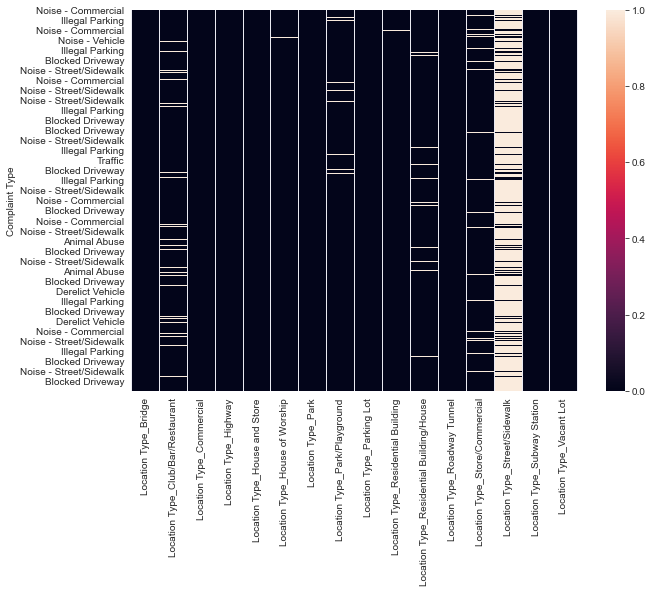

In [62]:
# displaying the heatmap to see the correlations 

plt.figure(figsize=(10,7))

sns.heatmap(dummy_df5)



From looking at the results of the heatmap we can see that there is a positive correlation with Location Type Street/Sidewalk and most of the other complaint types. This result further piqued my interest in utilizing other analysis tools. Location Type, Street/Sidewalk and most of the complaint types are light colored means that when the Location Types gets larger then complaint types also become larger. In the next sections I will run a crosstab analysis to further investigate the correlation. 

In [63]:
# displaying the crosstab to see how many occurrences there are for the different combinations

pd.crosstab(nyc311_df2['Location Type'], nyc311_df2['Complaint Type'])

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,,
Bridge,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Club/Bar/Restaurant,0,0,0,0,0,0,365,0,0,0,0,16841,0,0,0,0,0,0,0,0,21,0
Commercial,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Highway,0,0,0,0,13,0,0,0,15,0,0,0,0,0,0,0,0,0,0,186,0,0
House and Store,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
House of Worship,0,0,0,0,0,0,0,0,0,0,0,0,927,0,0,0,0,0,0,0,0,0
Park,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Park/Playground,122,0,0,0,0,0,98,0,353,8,0,0,0,4021,0,0,6,0,0,0,38,105
Parking Lot,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0


In [64]:
pd.crosstab(nyc311_df2['Location Type'], nyc311_df2['Complaint Type'],normalize=True)

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,,
Bridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Club/Bar/Restaurant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001223,0.000000,0.000000,0.000000,0.00000,0.056437,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000070,0.000000
Commercial,0.000208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Highway,0.000000,0.000000,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000,0.000050,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000623,0.000000,0.000000
House and Store,0.000312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
House of Worship,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003107,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Park,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Park/Playground,0.000409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000328,0.000000,0.001183,0.000027,0.00000,0.000000,0.000000,0.013475,0.000000,0.00000,0.000020,0.000000,0.000000,0.000000,0.000127,0.000352
Parking Lot,0.000369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000


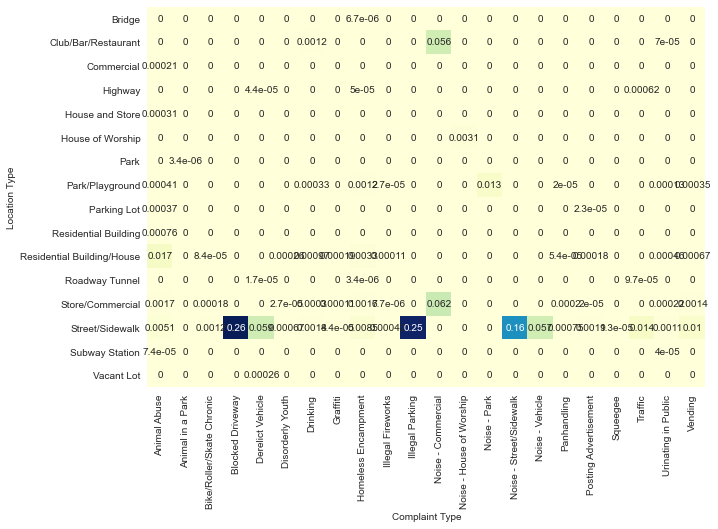

In [65]:
# displaying the heatmap with the normalize='True' option selected

plt.figure(figsize=(10,7))

sns.heatmap(pd.crosstab(nyc311_df2['Location Type'], nyc311_df2['Complaint Type'],normalize=True), cmap="YlGnBu",annot=True, cbar=False)

plt.show()

The crosstab above allows us to visualize the percentage of time each combination occurs.

The result:
Of the total occurrences of complaint types that are blocked driveways, 26% occur on Street/Sidewalks;
25% of the total occurrences of complaint types that are illegal parking occurred on Street/Sidewalks;



The majority of the percentages are less than 1%. From this particular crosstab it seems that Street/Sidewalks
have some influence on complaint types. I will conduct one more crosstab just to confirm



In [66]:
# when we use the normalize='columns' option allows the user to see the summary by columns

pd.crosstab(nyc311_df2['Location Type'], nyc311_df2['Complaint Type'],normalize='columns')

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,,
Bridge,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000454,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Club/Bar/Restaurant,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.286499,0.000000,0.000000,0.000000,0.0,0.477867,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.035533,0.000000
Commercial,0.007985,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Highway,0.000000,0.0,0.000000,0.0,0.000739,0.000000,0.000000,0.000000,0.003404,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.041416,0.000000,0.000000
House and Store,0.011977,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
House of Worship,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Park,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Park/Playground,0.015712,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.080100,0.047619,0.0,0.000000,0.0,1.0,0.0,0.0,0.019672,0.000000,0.0,0.000000,0.064298,0.027683
Parking Lot,0.014166,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.010819,0.0,0.000000,0.000000,0.000000


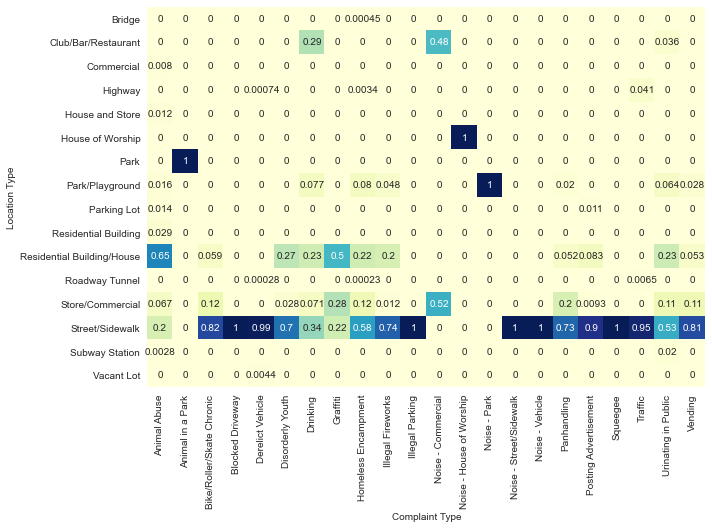

In [67]:
# displaying a heatmap for the crosstab with the normalize='option'

plt.figure(figsize=(10,7))

sns.heatmap(pd.crosstab(nyc311_df2['Location Type'], nyc311_df2['Complaint Type'],normalize='columns'), cmap="YlGnBu",annot=True, cbar=False)

plt.show()

How to read this heatmap is 95% of the Traffic complaints occurred on Street/Sidewalks. We can conclude that Street/Sidewalks has influence on complaint types since most of the double digit percentage occurrences is in Street/Sidewalks.